In [1]:
import os, sys
sys.path.append('../')
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
from utils import acc_plot, loss_plot

In [2]:
from keras.datasets import imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

2023-03-23 07:04:08.269254: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-23 07:04:08.636455: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in X_train[0]]) # 0, 1, 2 - symbolizes sth

In [4]:
decoded_review[:30]

'? this film was just brilliant'

In [5]:
len(X_train[1]), len(X_train[0]) # rozne dlugosci!

(189, 218)

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [7]:
X_train = vectorize_sequences(X_train)
X_test = vectorize_sequences(X_test)

In [8]:
X_train.shape

(25000, 10000)

In [9]:
y_test = np.float32(y_test)
y_train = y_train.astype('float32')

In [11]:
from keras.models import Sequential
from keras.layers import Dense

In [12]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(10000,)), # (10000,) because it is (10000, any batch_size)
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

2023-03-23 07:04:27.034697: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-03-23 07:04:27.034733: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: kk21
2023-03-23 07:04:27.034747: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: kk21
2023-03-23 07:04:27.034992: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 515.86.1
2023-03-23 07:04:27.035065: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 515.86.1
2023-03-23 07:04:27.035069: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 515.86.1
2023-03-23 07:04:27.036168: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neu

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
from keras import losses, metrics, optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [16]:
X_val = X_train[:10000]
X_train = X_train[10000:]

y_val = y_train[:10000]
y_train = y_train[10000:]

In [17]:
history = model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5123 - binary_accuracy: 0.7867 - val_loss: 0.3899 - val_binary_accuracy: 0.8695
Epoch 2/20
30/30 [==============================] - 0s 9ms/step - loss: 0.3021 - binary_accuracy: 0.9059 - val_loss: 0.3033 - val_binary_accuracy: 0.8886
Epoch 3/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2245 - binary_accuracy: 0.9268 - val_loss: 0.2804 - val_binary_accuracy: 0.8907
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1782 - binary_accuracy: 0.9440 - val_loss: 0.3010 - val_binary_accuracy: 0.8793
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1468 - binary_accuracy: 0.9545 - val_loss: 0.2807 - val_binary_accuracy: 0.8895
Epoch 6/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1195 - binary_accuracy: 0.9635 - val_loss: 0.3491 - val_binary_accuracy: 0.8720
Epoch 7/20
30/30 [==============================] - 0s 9ms/step - loss: 0

In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

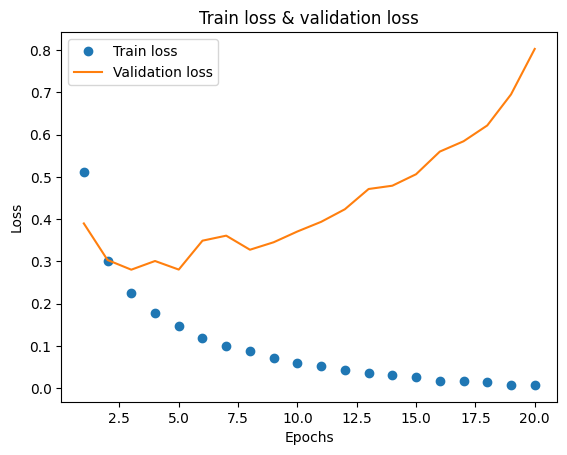

In [19]:
loss_plot(history_dict)

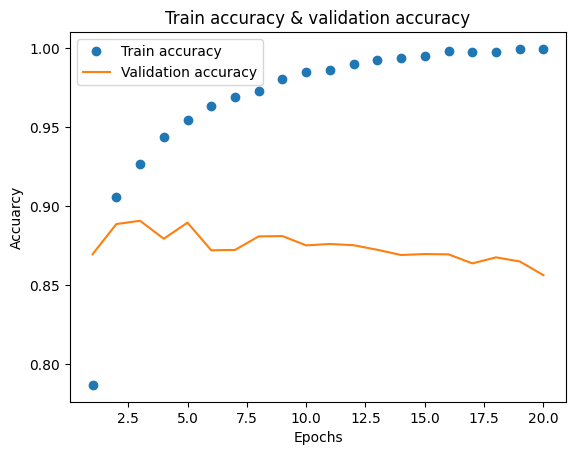

In [20]:
acc_plot(history_dict)

<b>Overfitting! It would be necessary to re-train the model on only 4 epochs.</b>

In [21]:
model.predict(X_test)

782/782 [==============================] - 1s 843us/step


array([[0.03607851],
       [1.        ],
       [0.9989183 ],
       ...,
       [0.00635475],
       [0.13094856],
       [0.9885078 ]], dtype=float32)

# Methods to fight overfitting
- More data
- Less parameters in network
- Regularization
- Dropout

In [22]:
from keras import regularizers
lambda_coef = 0.001

In [23]:
l2_model = Sequential([
    Dense(16, kernel_regularizer=regularizers.l2(lambda_coef), activation='relu', input_shape=(10000,)),
    Dense(16, kernel_regularizer=regularizers.l2(lambda_coef), activation='relu'),
    Dense(1, activation='sigmoid')
])

Epoch 1/10
30/30 [==============================] - 1s 16ms/step - loss: 0.6057 - accuracy: 0.7486 - val_loss: 0.4828 - val_accuracy: 0.8582
Epoch 2/10
30/30 [==============================] - 0s 9ms/step - loss: 0.4088 - accuracy: 0.8861 - val_loss: 0.4056 - val_accuracy: 0.8627
Epoch 3/10
30/30 [==============================] - 0s 9ms/step - loss: 0.3247 - accuracy: 0.9114 - val_loss: 0.3615 - val_accuracy: 0.8778
Epoch 4/10
30/30 [==============================] - 0s 9ms/step - loss: 0.2796 - accuracy: 0.9267 - val_loss: 0.3358 - val_accuracy: 0.8879
Epoch 5/10
30/30 [==============================] - 0s 9ms/step - loss: 0.2527 - accuracy: 0.9333 - val_loss: 0.3313 - val_accuracy: 0.8879
Epoch 6/10
30/30 [==============================] - 0s 9ms/step - loss: 0.2337 - accuracy: 0.9409 - val_loss: 0.3383 - val_accuracy: 0.8839
Epoch 7/10
30/30 [==============================] - 0s 9ms/step - loss: 0.2190 - accuracy: 0.9457 - val_loss: 0.3397 - val_accuracy: 0.8847
Epoch 8/10
30/30 [=

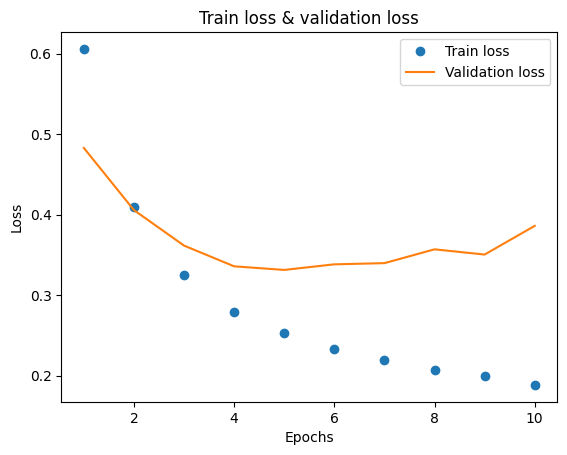

In [24]:
l2_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = l2_model.fit(X_train, y_train, epochs=10, batch_size=512, validation_data=(X_val, y_val))

loss_plot(history.history,epochs=10)

Epoch 1/10
30/30 [==============================] - 1s 15ms/step - loss: 1.1401 - accuracy: 0.7545 - val_loss: 0.7203 - val_accuracy: 0.8238
Epoch 2/10
30/30 [==============================] - 0s 9ms/step - loss: 0.6771 - accuracy: 0.8343 - val_loss: 0.6518 - val_accuracy: 0.8501
Epoch 3/10
30/30 [==============================] - 0s 9ms/step - loss: 0.6260 - accuracy: 0.8481 - val_loss: 0.6147 - val_accuracy: 0.8569
Epoch 4/10
30/30 [==============================] - 0s 9ms/step - loss: 0.5909 - accuracy: 0.8601 - val_loss: 0.6000 - val_accuracy: 0.8539
Epoch 5/10
30/30 [==============================] - 0s 10ms/step - loss: 0.5762 - accuracy: 0.8619 - val_loss: 0.5823 - val_accuracy: 0.8628
Epoch 6/10
30/30 [==============================] - 0s 9ms/step - loss: 0.5585 - accuracy: 0.8657 - val_loss: 0.5967 - val_accuracy: 0.8433
Epoch 7/10
30/30 [==============================] - 0s 9ms/step - loss: 0.5487 - accuracy: 0.8665 - val_loss: 0.5946 - val_accuracy: 0.8440
Epoch 8/10
30/30 [

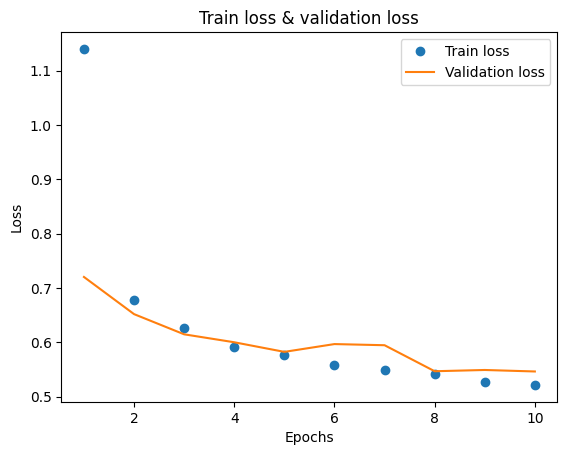

In [25]:
l1_model = Sequential([
    Dense(16, kernel_regularizer=regularizers.l1(lambda_coef), activation='relu', input_shape=(10000,)),
    Dense(16, kernel_regularizer=regularizers.l1(lambda_coef), activation='relu'),
    Dense(1, activation='sigmoid')
])
l1_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = l1_model.fit(X_train, y_train, epochs=10, batch_size=512, validation_data=(X_val, y_val))

loss_plot(history.history,epochs=10)

Epoch 1/10
30/30 [==============================] - 1s 16ms/step - loss: 1.1712 - accuracy: 0.7414 - val_loss: 0.7677 - val_accuracy: 0.7753
Epoch 2/10
30/30 [==============================] - 0s 9ms/step - loss: 0.7055 - accuracy: 0.8287 - val_loss: 0.7086 - val_accuracy: 0.7996
Epoch 3/10
30/30 [==============================] - 0s 9ms/step - loss: 0.6528 - accuracy: 0.8421 - val_loss: 0.6470 - val_accuracy: 0.8463
Epoch 4/10
30/30 [==============================] - 0s 10ms/step - loss: 0.6206 - accuracy: 0.8489 - val_loss: 0.6214 - val_accuracy: 0.8481
Epoch 5/10
30/30 [==============================] - 0s 10ms/step - loss: 0.6003 - accuracy: 0.8557 - val_loss: 0.6190 - val_accuracy: 0.8426
Epoch 6/10
30/30 [==============================] - 0s 9ms/step - loss: 0.5854 - accuracy: 0.8587 - val_loss: 0.6088 - val_accuracy: 0.8480
Epoch 7/10
30/30 [==============================] - 0s 9ms/step - loss: 0.5798 - accuracy: 0.8577 - val_loss: 0.5849 - val_accuracy: 0.8568
Epoch 8/10
30/30 

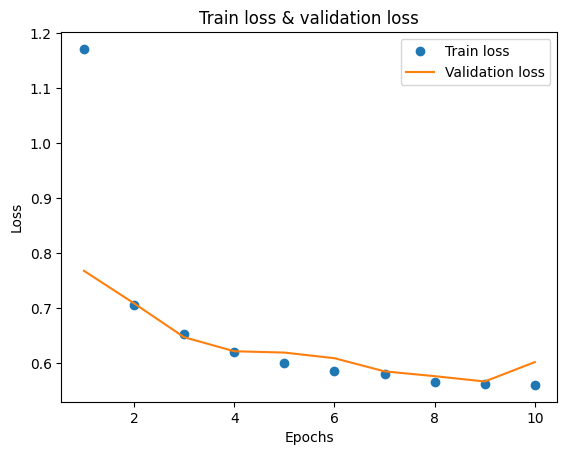

In [26]:
l1l2_model = Sequential([
    Dense(16, kernel_regularizer=regularizers.l1_l2(l1=lambda_coef, l2=lambda_coef), activation='relu', input_shape=(10000,)),
    Dense(16, kernel_regularizer=regularizers.l1_l2(l1=lambda_coef, l2=lambda_coef), activation='relu'),
    Dense(1, activation='sigmoid')
])
l1l2_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = l1l2_model.fit(X_train, y_train, epochs=10, batch_size=512, validation_data=(X_val, y_val))

loss_plot(history.history,epochs=10)

Epoch 1/10
30/30 [==============================] - 1s 15ms/step - loss: 0.6589 - accuracy: 0.5981 - val_loss: 0.5784 - val_accuracy: 0.8142
Epoch 2/10
30/30 [==============================] - 0s 9ms/step - loss: 0.5597 - accuracy: 0.7160 - val_loss: 0.4586 - val_accuracy: 0.8671
Epoch 3/10
30/30 [==============================] - 0s 9ms/step - loss: 0.4748 - accuracy: 0.7822 - val_loss: 0.3835 - val_accuracy: 0.8757
Epoch 4/10
30/30 [==============================] - 0s 9ms/step - loss: 0.4125 - accuracy: 0.8253 - val_loss: 0.3421 - val_accuracy: 0.8824
Epoch 5/10
30/30 [==============================] - 0s 9ms/step - loss: 0.3560 - accuracy: 0.8608 - val_loss: 0.3021 - val_accuracy: 0.8852
Epoch 6/10
30/30 [==============================] - 0s 10ms/step - loss: 0.3246 - accuracy: 0.8845 - val_loss: 0.2839 - val_accuracy: 0.8875
Epoch 7/10
30/30 [==============================] - 0s 9ms/step - loss: 0.2847 - accuracy: 0.9039 - val_loss: 0.2892 - val_accuracy: 0.8900
Epoch 8/10
30/30 [

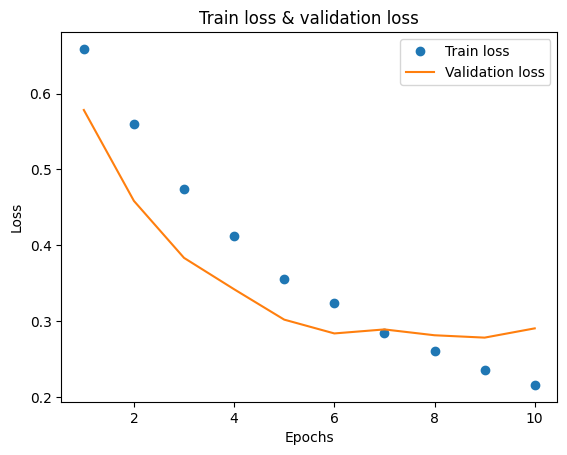

In [27]:
from keras.layers import Dropout
dpt_model = Sequential([
    Dense(16, activation='relu', input_shape=(10000,)),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
dpt_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = dpt_model.fit(X_train, y_train, epochs=10, batch_size=512, validation_data=(X_val, y_val))

loss_plot(history.history,epochs=10)